### Figure 4

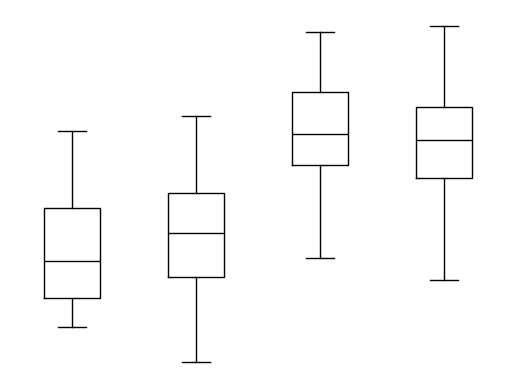

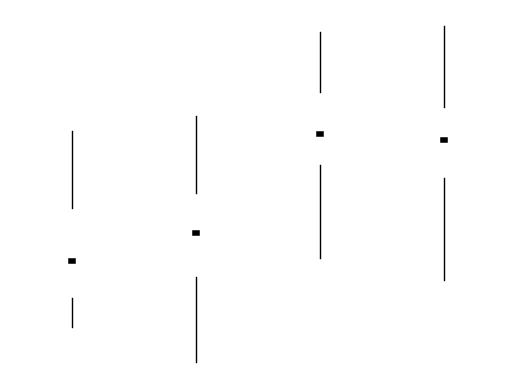

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# fake data
np.random.seed(19680801)
data1 = np.random.normal(size=(47, 2), loc=3.5, scale=1.75)
data2 = np.random.normal(size=(47, 2), loc=6.5, scale=1.75)
labels = list('ABCD')
fs = 10  # fontsize

data = np.concatenate([data1,data2],axis=1)

f,a = plt.subplots()

a.boxplot(data,medianprops={'color': 'black', 'linewidth': 1},showfliers=False);

plt.axis("off")
plt.savefig("../figures/Figure4a.png",dpi=300,bbox_inches="tight")

f,a = plt.subplots()

bp = a.boxplot(data,medianprops={"linewidth":0,"linestyle":None},showfliers=False,
         showbox=False, showcaps=False);


for median in bp['medians']:
    median.set(color='k', linewidth=0,)
    x,y = median.get_data()
    xn = (x-(x.sum()/2.))*0.05+(x.sum()/2.)
    plt.plot(xn, y, color="k", linewidth=4, zorder=4)

plt.axis("off")
plt.savefig("../figures/Figure4b.png",dpi=300,bbox_inches="tight")

### Figure 5

C:\Users\jhtchns2\.conda\envs\ace-592-sae\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


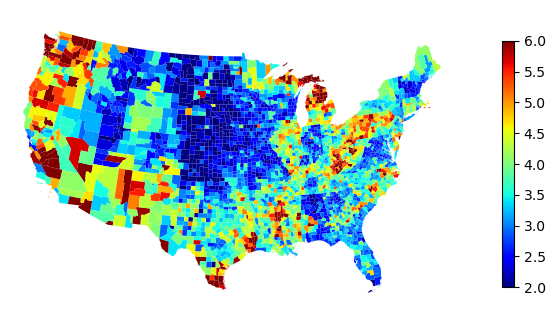

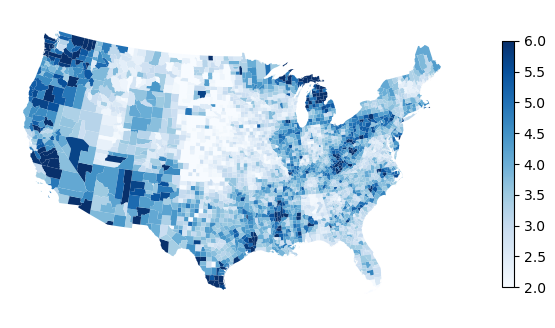

In [3]:
from urllib.request import urlopen
import json
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp

gdf = gp.read_file("../data/cb_2018_us_county_500k.shp")

gdf['fips'] = gdf['STATEFP'] + gdf['COUNTYFP']

df = pd.read_csv("../data/unemployment_data.csv")
df = df.rename(columns={"FIPS_Code":"fips"})
df['fips'] = df['fips'].astype(str).str.zfill(5)

gdf = gdf.merge(df,how="left")

gdf['median_hh_inc21'] = pd.to_numeric(gdf['Median_Household_Income_2021'].str.replace(",",""),errors="coerce")

gdf['unemployment22'] = pd.to_numeric(gdf['Unemployment_rate_2022'],errors="coerce")
gdf['unemployment21'] = pd.to_numeric(gdf['Unemployment_rate_2021'],errors="coerce")

gdf['unemp22-21_pct'] = (100*(gdf['unemployment22'] - gdf['unemployment21'])/gdf['unemployment21'])
gdf['unemp22-21'] = (gdf['unemployment22'] - gdf['unemployment21'])

gdf = gdf.to_crs({'init': 'epsg:5070'})

f,a = plt.subplots(figsize=(10,4))
gdf.plot(column="unemployment22",legend=True,cmap="jet",vmax=6,vmin=2,ax=a,legend_kwds={'shrink': .8})
plt.xlim(-2.5*10**6,2.5*10**6)
plt.ylim(0,3.4*10**6)
plt.axis("off")
plt.savefig("../figures/Figure5a.png",dpi=300,bbox_inches="tight")

f,a = plt.subplots(figsize=(10,4))
gdf.plot(column="unemployment22",legend=True,cmap="Blues",vmax=6,vmin=2,ax=a,legend_kwds={'shrink': .8})
plt.xlim(-2.5*10**6,2.5*10**6)
plt.ylim(0,3.4*10**6)
plt.axis("off")
plt.savefig("../figures/Figure5b",dpi=300,bbox_inches="tight")

### Figure 6

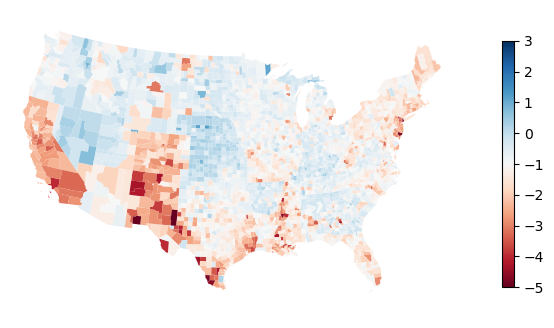

In [6]:
f,a = plt.subplots(figsize=(10,4))
gdf.plot(column="unemp22-21",legend=True,vmax=3,vmin=-5,ax=a,cmap="RdBu",legend_kwds={'shrink': .8})
plt.xlim(-2.5*10**6,2.5*10**6)
plt.ylim(0,3.4*10**6)
plt.axis("off")
# plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig("../figures/Figure6b.png",dpi=300,bbox_inches="tight")

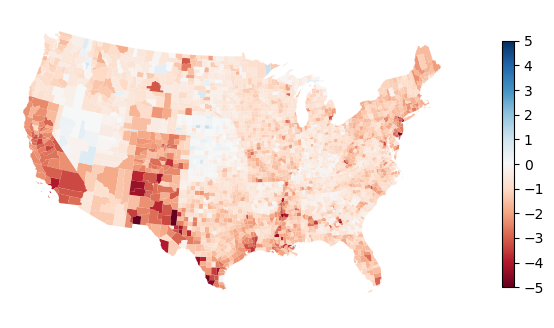

In [7]:
f,a = plt.subplots(figsize=(10,4))
gdf.plot(column="unemp22-21",legend=True,vmax=5,vmin=-5,ax=a,cmap="RdBu",legend_kwds={'ticks': list(range(-5,6)),'shrink': .8})
plt.xlim(-2.5*10**6,2.5*10**6)
plt.ylim(0,3.4*10**6)
plt.axis("off")
plt.savefig("../figures/Figure6a.png",dpi=300,bbox_inches="tight")